# Customer Churn Analysis

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [16]:
# Importing basic library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Customer Churn Analysis.csv')
data.shape

(7043, 21)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The data set includes information about:
    
Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online * security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method,

paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

Churn - dependent feature ('Yes' denotes customers left, 'No' denotes customer stay here)

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the data which is good.

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Target variable has imbalanced class distribution. Negative class (Churn=No) is much less than positive class (churn=Yes). Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue.

# EDA

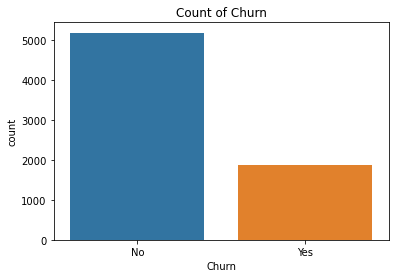

In [18]:
# plotting with target feature
sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

In [19]:
### How many amount loss from customer churn
loss = []
for values in data.loc[data['Churn'] == 'Yes', 'TotalCharges']:
    value = float(values)
    loss.append(value)
print(np.round(sum(loss)))

2862927.0


We have lost arround $2862927 due to customer churn

In [11]:
columns = data.columns
binary_cols = []

for col in columns:
    if data[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [12]:
binary_cols # categorical features with two classes

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

The remaining categorical variables have more than two values (or classes).

In [13]:
# Categorical features with multiple classes
multiple_cols_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

Let's check the class distribution of binary features.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

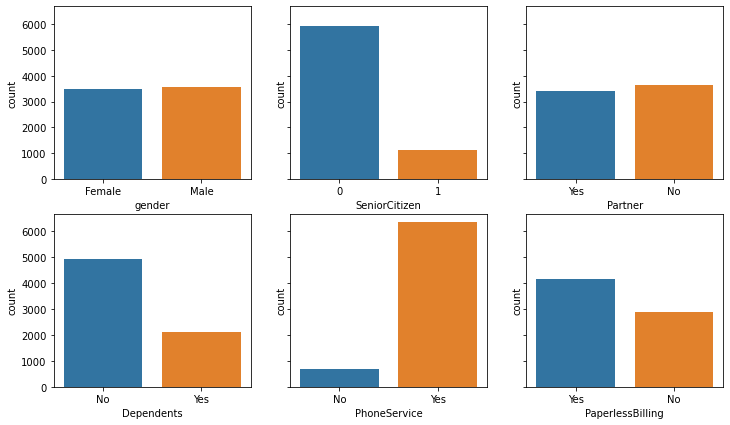

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("gender", data=data, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=data, ax=axes[0,1])
sns.countplot("Partner", data=data, ax=axes[0,2])
sns.countplot("Dependents", data=data, ax=axes[1,0])
sns.countplot("PhoneService", data=data, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=data, ax=axes[1,2])

There is a high imbalance in SeniorCitizen and PhoneService variables. Most of the customers are not senior and similarly, most customers have a phone service.

It is better to check how the target variable (churn) changes according to the binary features. To be able to make calculations, we need to change the values of target variable. "Yes" will be 1 and "No" will be 0.

In [20]:
churn_numeric = {'Yes':1, 'No':0}
data.Churn.replace(churn_numeric, inplace=True)

In [23]:
data[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model.

Text(0.5, 1.0, '% of Senior Citizens')

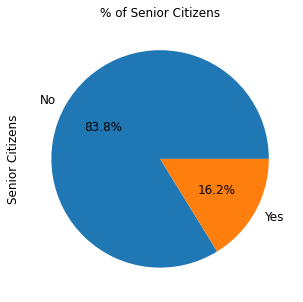

In [51]:
# pie chart for Count of Senior citizens
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Only 16.2% customers who are senior citizons but remaining 83.8% customers are young people

In [24]:
data[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [25]:
data[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [27]:
data[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [28]:
data[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [29]:
data[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


The other binary features have an effect on the target variable. The phone service may also be skipped if you think 2% difference can be ignored. I have decided to use this feature in the model.

In [30]:
table = pd.pivot_table(data, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [31]:
table = pd.pivot_table(data, values='Churn', index=['Partner'],
                    columns=['Dependents'], aggfunc=np.mean)
table

Dependents,No,Yes
Partner,,
No,0.342378,0.213296
Yes,0.254083,0.142367


It is time to explore other categorical features. We also have continuous features such as tenure, monthly charges and total charges which I will discuss in the next part.

There are 6 variables that come with internet service. There variables come into play if customer has internet service.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

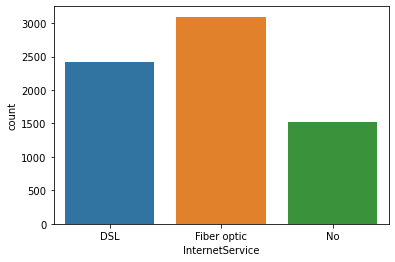

In [32]:
sns.countplot("InternetService", data=data)

In [33]:
data[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [34]:
data[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


Internet service variable is definitely important in predicting churn rate. As you can see, customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic. This company may have some problems with fiber optic connection. However, it is not a good way to make assumptions based on only one variable. Let's also check the monthly charges.

In [35]:
data[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

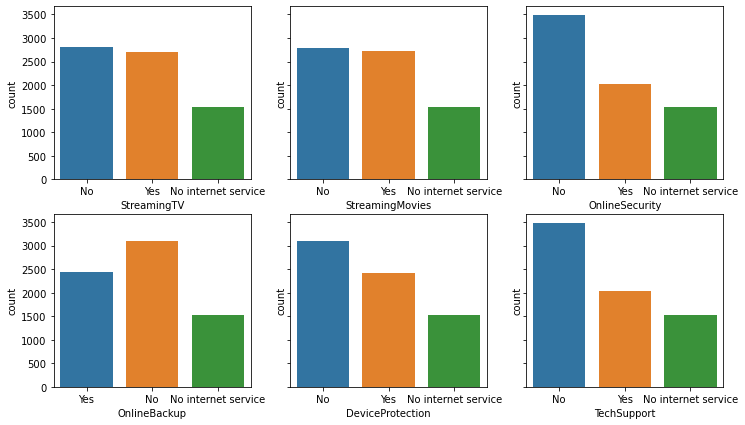

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=data, ax=axes[0,0])
sns.countplot("StreamingMovies", data=data, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=data, ax=axes[0,2])
sns.countplot("OnlineBackup", data=data, ax=axes[1,0])
sns.countplot("DeviceProtection", data=data, ax=axes[1,1])
sns.countplot("TechSupport", data=data, ax=axes[1,2])

In [37]:
data[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [38]:
data[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [39]:
data[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [40]:
data[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [41]:
data[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [42]:
data[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


All internet service related features seem to have different churn rates for their classes.

Phone service

In [43]:
data.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [44]:
data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

If a customer does not have a phone service, he/she cannot have multiple lines. MultipleLines column includes more specific data compared to PhoneService column. So I will not include PhoneService column as I can understand the number of people who have phone service from MultipleLines column. MultipleLines column takes the PhoneService column one step further.

In [45]:
data[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


Contract, Payment Method

<AxesSubplot:xlabel='Contract', ylabel='count'>

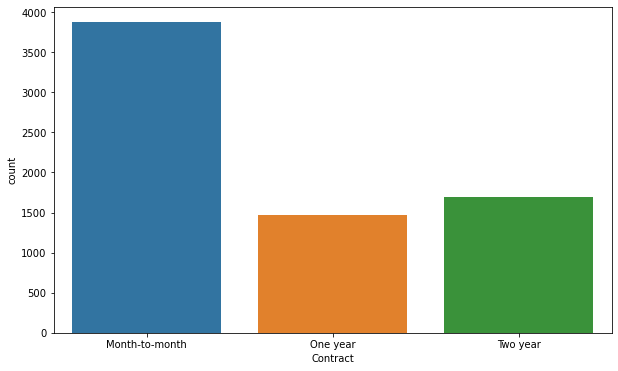

In [46]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=data)

In [47]:
data[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


It seems like, as expected, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

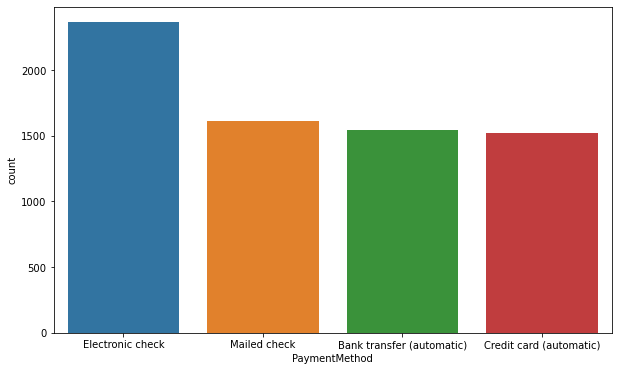

In [48]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=data)

In [49]:
data[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


Continuous Variables

The continuous features are tenure, monthly charges and total charges. The amount in total charges columns is proportional to tenure (months) multiplied by monthly charges. So it is unnecessary to include total charges in the model. Adding unnecassary features will increase the model complexity. It is better to have a simpler model when possible. Complex models tend to overfit and not generalize well to new, previously unseen observations. Since the goal of a machine learning model is to predict or explain new observations, overfitting is a crucial issue.

Let's also have a look at the distribution of continuous features.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

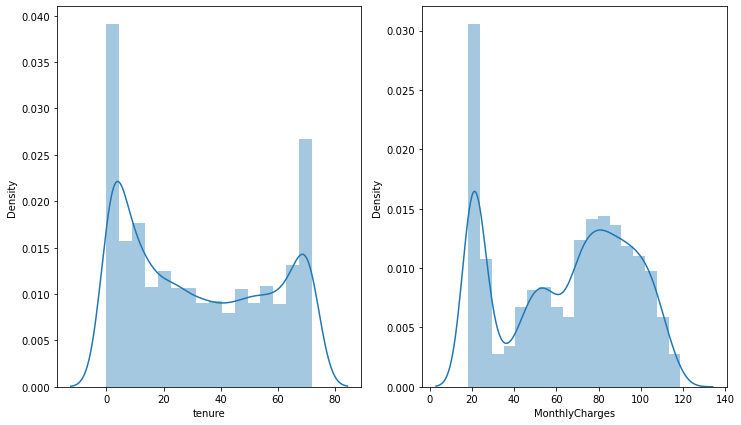

In [52]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.distplot(data["tenure"], ax=axes[0])
sns.distplot(data["MonthlyCharges"], ax=axes[1])

In [53]:
data[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


It is clear that people who have been a customer for a long time tend to stay with the company. The average tenure in months for people who left the company is 20 months less than the average for people who stay.

It seems like monthly charges also have an effect on churn rate.

Contract and tenure features may be correlated because customer with long term contract are likely to stay longer with the company. Let's figure out.

In [54]:
data[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


As expected, contract and tenure are highly correlated. Customers with long contracts have been a customer for longer time than customers with short-term contracts. I think contract will add little to no value to tenure feature so I will not use contract feature in the model.

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model: 1) Customer ID 2) Gender 3) PhoneService 4) Contract 5) TotalCharges

In [55]:
data.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [56]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


# Data Preprocessing

Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model. The categorical variables in our data set are not ordinal (i.e. there is no order in them). For example, "DSL" internet service is not superior to "Fiber optic" internet service. An example for an ordinal categorical variable would be ratings from 1 to 5 or a variable with categories "bad", "average" and "good".

When we encode the categorical variables, a number will be assigned to each category. The category with higher numbers will be considered more important or effect the model more. Therefore, we need to do encode the variables in a way that each category will be represented by a column and the value in that column will be 0 or 1.

We also need to scale continuous variables. Otherwise, variables with higher values will be given more importance which effects the accuracy of the model.

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [62]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(data, columns=cat_features, drop_first=True)

In [64]:
encoder = LabelEncoder()
for feature in data:
    data[feature] = encoder.fit_transform(data[feature])

In [65]:
data

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,1,2,142,0
1,0,0,0,34,0,0,2,0,2,0,0,0,0,3,498,0
2,0,0,0,2,0,0,2,2,0,0,0,0,1,3,436,1
3,0,0,0,45,1,0,2,0,2,2,0,0,0,0,266,0
4,0,0,0,2,0,1,0,0,0,0,0,0,1,2,729,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,0,2,2,2,2,1,3,991,0
7039,0,1,1,72,2,1,0,2,2,0,2,2,1,1,1340,0
7040,0,1,1,11,1,0,2,0,0,0,0,0,1,2,137,0
7041,1,1,0,4,2,1,0,0,0,0,0,0,1,3,795,1


<AxesSubplot:>

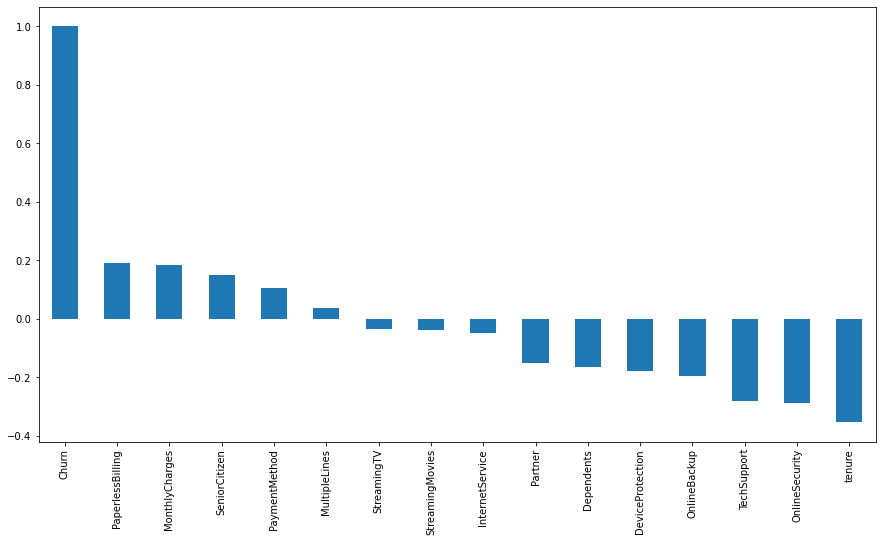

In [66]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

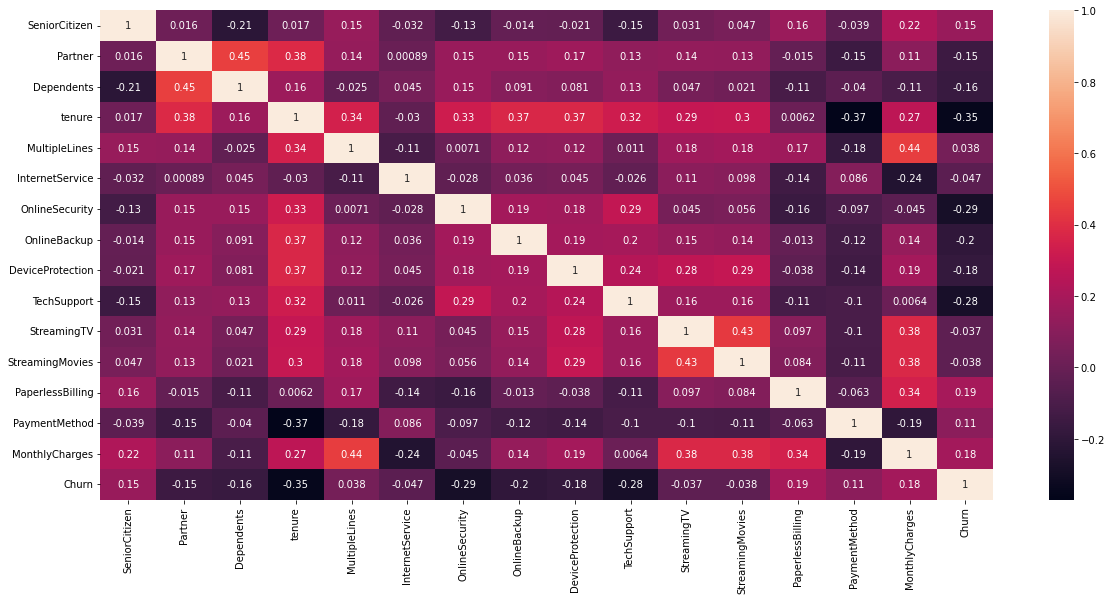

In [67]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)

Iam using ensemble methods, No need to perform feature scaling for ensemble techniques, its prediction based on the creating multiple decision trees

Splitting the dataset into train and test

In [68]:
# splitting dataset into dependent and independent feature
X = data.drop(columns='Churn')
y = data['Churn']

In [70]:
from sklearn.model_selection import train_test_split
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Apply into machine learning algorithm:

In [72]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest
from collections import Counter

In [95]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.7977288857345636
Confusion matrix :
 [[932 201]
 [ 84 192]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      1133
           1       0.49      0.70      0.57       276

    accuracy                           0.80      1409
   macro avg       0.70      0.76      0.72      1409
weighted avg       0.83      0.80      0.81      1409



In [74]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.801277501774308
Confusion matrix :
 [[953 217]
 [ 63 176]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      1170
           1       0.45      0.74      0.56       239

    accuracy                           0.80      1409
   macro avg       0.69      0.78      0.71      1409
weighted avg       0.85      0.80      0.82      1409



In [75]:
# decisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.7934705464868701
Confusion matrix :
 [[945 220]
 [ 71 173]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      1165
           1       0.44      0.71      0.54       244

    accuracy                           0.79      1409
   macro avg       0.69      0.76      0.70      1409
weighted avg       0.85      0.79      0.81      1409



# Resampling

As we compare to the imbalance dataset our model are perform like okay not a better model to build for end to end project. So we need to over smpling data for reducing the TN, FN and increase the FP and TP for model building

Text(0.5, 1.0, 'Class Distribution Before Resampling')

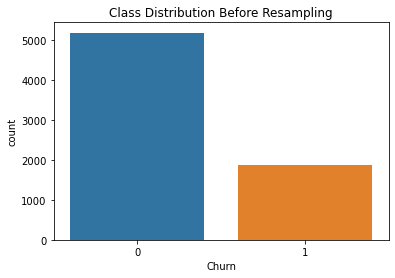

In [76]:
sns.countplot('Churn', data=data).set_title('Class Distribution Before Resampling')

As we briefly discussed in the beginning, target variables with imbalanced class distribution is not desired for machine learning models. I will use upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.

In [81]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(data, columns=cat_features, drop_first=True)

In [82]:
sc = MinMaxScaler()
a = sc.fit_transform(data[['tenure']])
b = sc.fit_transform(data[['MonthlyCharges']])

In [83]:
X['tenure'] = a
X['MonthlyCharges'] = b

In [84]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [85]:
print(len(X_no),len(X_yes))

5174 1869


In [86]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


In [87]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

Text(0.5, 1.0, 'Class Distribution After Resampling')

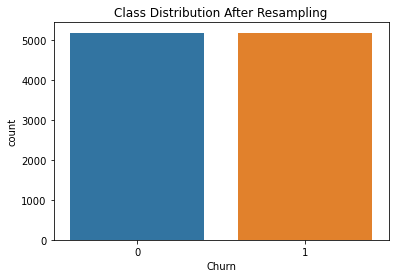

In [88]:
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

# ML model

We need to divide the data set into training and test subsets so that we are able to measure the performance of our model on new, previously unseen examples.

In [89]:
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Logistic Regression

In [91]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.7608695652173914
Confusion matrix :
 [[785 236]
 [259 790]]
Classification report :
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1021
           1       0.77      0.75      0.76      1049

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



# Random forest classifier

In [92]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.8077294685990338
Confusion matrix :
 [[806 160]
 [238 866]]
Classification report :
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       966
           1       0.84      0.78      0.81      1104

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



# DecisionTree Classifier

In [93]:
# decisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.7671497584541063
Confusion matrix :
 [[783 221]
 [261 805]]
Classification report :
               precision    recall  f1-score   support

           0       0.75      0.78      0.76      1004
           1       0.78      0.76      0.77      1066

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



# Ridge Classifier

In [97]:
# Ridge Classifier

clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model
pred = clf_ridge.predict(X_train)  #make predictions on training set
accuracy_score(y_train, pred) #accuracy on training set
confusion_matrix(y_train, pred)
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

print(f'Accuracy score : {accuracy_score(y_test, pred_test)}')
print(f'Confusion matrix :\n {confusion_matrix(y_train, pred)}')
print(f'accuracy on training set :\n {accuracy_score(y_train, pred)}')

Accuracy score : 0.7628019323671498
Confusion matrix :
 [[3044 1086]
 [ 919 3229]]
accuracy on training set :
 0.7577917371345736


The model achieved 75% accuracy on training set and 76% accuracy on test set. The model is not overfitting because accuracies on training and test sets are pretty close. However, 75% accuracy is not very good so we will try to get a better accuracy using a different model.

# Random Forests

In [99]:
# Random Forests

clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)
pred = clf_forest.predict(X_train)
print(f'accuracy on training set :\n {accuracy_score(y_train, pred)}')
print(f'Confusion matrix :\n {confusion_matrix(y_train, pred)}')
print(f'Accuracy score : {accuracy_score(y_test, pred_test)}')

accuracy on training set :
 0.8863251993235081
Confusion matrix :
 [[3430  700]
 [ 241 3907]]
Accuracy score : 0.7628019323671498


The accuracy on training set is 12% higher than the accuracy on test set which indicates a slight overfitting. We can decrease the depth of a tree in the forest because as trees get deeper, they tend to be more specific which results in not generalizing well. However, reducing tree depth may also decrease the accuracy. So we need to be careful when optimizing the parameters. We can also increase the number of trees in the forest which will help the model to be more generalized and thus reduce overfitting. Parameter tuning is a very critical part in almost every project.

Another way is to do cross-validation which allows to use every sample in training and test set.

# GridSearchCV

cv = 5 means having a 5-fold cross validation. So dataset is divided into 5 subset. At each iteration, 4 subsets are used in training and the other subset is used as test set. When 5 iteration completed, the model used all samples as both training and test samples.

n_jobs parameter is used to select how many processors to use. -1 means using all processors.

In [101]:
# GridSearchCV

parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)
clf.fit(X, y)
clf.best_params_
clf.best_score_

0.9005610776052283

# Conclusion :

## We have achieved an overall accuracy of almost 90%. This is the mean cross-validated score of the best_estimator